In [1]:
import os
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy.signal as sig
#python speech

In [ ]:
emotion_baum1s = ["anger","disgust","fear","happiness","sadness","unsure"]
emotion_rml = ["an","di","fe","ha","sa","su"]
dataset = ["baum1s","RML"]

emotion= emotion_baum1s[5]

# Define the directory where the frames will be saved
audio_directory = f"F:\\FYP\\Dataset\\{dataset[0]}\\acted\\{emotion}\\audio"
# List the files in the current directory
files = os.listdir(audio_directory)

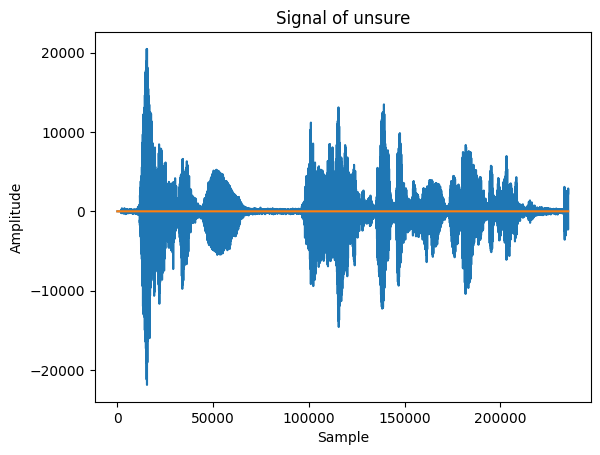

In [ ]:
# Read the .wav file
fs, data = wav.read(audio_directory + "\\" + files[0])

# Plot the signals
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Signal of {emotion}')
plt.show()

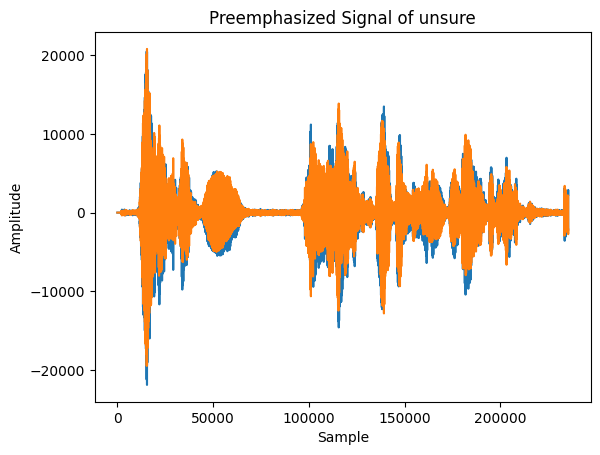

In [ ]:
# Apply a preemphasis filter to a signal
preemphasized = sig.lfilter([1, -0.95], 1, data)
# Plot the preemphasized signal
plt.plot(preemphasized)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Preemphasized Signal of {emotion}')
plt.show()

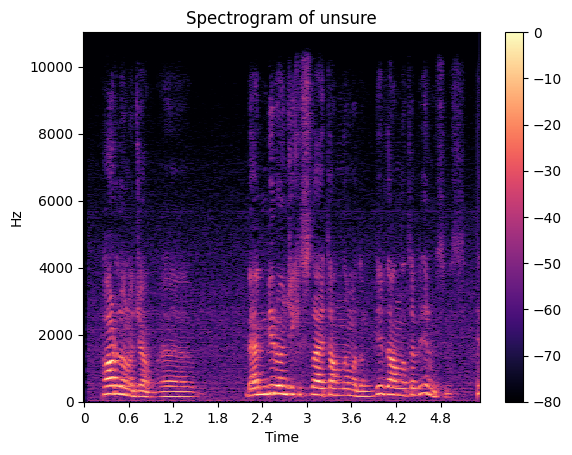

C:\Users\Moin\AppData\Local\Temp\ipykernel_14652\775067181.py:15: FutureWarning: Pass y=[0.         0.         0.         ... 0.03320459 0.03322184 0.0357181 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)


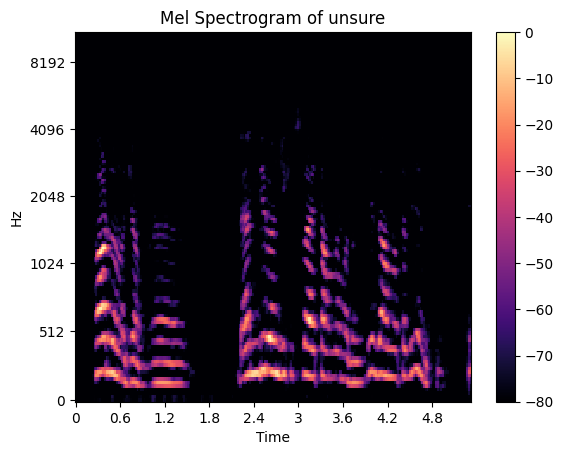

In [ ]:
# Load the audio file
y, sr = librosa.load(audio_directory + "\\" + files[0])

# Compute the spectrogram
S = librosa.stft(y)

# Plot the spectrogram
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis="time", y_axis="linear")
plt.title(f"Spectrogram of {emotion}")
plt.colorbar()
plt.show()

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y, sr=sr)

# Plot the Mel spectrogram
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis="time", y_axis="mel")
plt.title(f"Mel Spectrogram of {emotion}")
plt.colorbar()
plt.show()
print(sr)

In [ ]:
emo_dict = ["happiness", "anger", "sadness", "disgust", "fear" ,"interest"]

for i in emo_dict:
  path =f"F:\\FYP\\Dataset\\baum1s\\acted\\{i}\\audio"
  # Loop through each audio file
  for audio_file in os.listdir(path):
    # Load audio file
    data, sampling_rate = librosa.load(path+'/'+audio_file)

    # Compute mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)

    # Plot mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()

    # Save mel spectrogram as image
    audio_file=audio_file.replace('.wav','')
    plt.savefig(f'F:/FYP/Dataset/baum1s/train/mel_train/{i}/{audio_file}.png')